<a href="https://colab.research.google.com/github/saavedramarcosdavid/Aprendizaje-de-Maquina/blob/main/Clase2/Clase_2_Clasificaci%C3%B3n_Estad%C3%ADstica_param%C3%A9trica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje de máquina - Clase 2

## Ejercicio 1
En [casos_covid_bahia.csv](https://github.com/manlio99/Materia-deaprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv) y [camas_covid_bahia.csv](https://github.com/manlio99/Materia-deaprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv)
están datasets de la situación epidemiológica y sanitaria relacionada con el covid en
Bahía Blanca en los últimos meses (fuente
https://datos.bahia.gob.ar/dataset?groups=covid19).

Las variables son discretas (personas) pero se puede aplicar razonablemente el análisis estadístico como si fuesen valores continuos.

* Hay variables que puedan ser razonablemente consideradas normales? 
* Hay variables que tienen un comportamiento sospechoso?

### Funciones útiles para ambos datasets
Estas funciones además de graficar los histogramas y distribución de los datos correspondientes al DataFrame de Pandas pasado por parámetro, realiza un análisis para determinar si los datos pueden ser considerados normales siguiendo alguno de los 4 criterios posibles (seleccionable mediante un parámetro de la función):

* Shapiro-Wilk test
* D’Agostino’s K-squared test
* Chi-Square Normality Test
* Lilliefors Test for Normality

En todos ellos se plantea la siguiente prueba de hipótesis:
* Si el valor p ≤ 0.05, entonces rechazamos la hipótesis nula, es decir, asumimos que la distribución de nuestra variable no es normal/gaussiana.
* Si el valor p > 0.05, entonces no rechazamos la hipótesis nula, es decir, asumimos que la distribución de nuestra variable es normal/gaussiana.

En el análisis final se ha considerado D’Agostino’s K-squared test.

Sin embargo, también se utilizará el "ojímetro" para dar una respuesta visual sobre la posible distribución normal de las variables.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro,normaltest,chisquare
from statsmodels.stats.diagnostic import lilliefors

def print_hist(data,title, ax, criterio=0):
    '''
        print_hist:
            Función para dibujar el histograma y la distribución de los datos.
            Además se intenta decifrar si tiene o no distribucion normal segun el criterio indicado
    '''
    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)
    
    if criterio==0:
        stat, p = shapiro(data)
    elif criterio==1:
        stat, p = normaltest(data)
    elif criterio==2:
        stat, p = chisquare(data)
    elif criterio==3:
        stat, p = lilliefors(data)
    else:
        print("Criterio no válido")

    alpha = 0.05
    if p > alpha:
        text = 'La muestra parece Normal\n(no se rechaza H0)\n'
        color = "g"
        return_value = 1
    else:
        color = "orange"
        text = 'La muestra no parece Normal\n(se rechaza H0)\n'
        return_value = 0
    text+=f"p = {p:.4f}\n"
    text+=f"$\\mu$ = {data.mean():.3f}\n"
    text+=f"$\\sigma$ = {data.std(ddof=1):.3f}"

    bbox = dict(boxstyle='round', fc=color, ec=color, alpha=0.3)
    ax.text(0.38, 0.68, text, fontsize=11, bbox=bbox, transform=ax.transAxes)
    ax.set_title(title)

    return return_value

def print_dataset(df, fig_rows, fig_cols, criterio=0):
    '''
        print_dataset:
            Recibe un DataFrame, dibuja sus distribuciones de datos y cuenta cuántos tienen distribución normal
    '''
    cols = df.columns
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=((fig_cols*25)//5, (fig_rows*8)//2))
    axes = axes.ravel()

    x = 0
    for col_name, ax in zip(cols, axes):
        x += print_hist(df[col_name],"Distribución de " + col_name, ax, criterio)

    print("Cantidad de datos con distribución normal: ",x)

    fig.tight_layout()
    plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Análisis de [casos_covid_bahia.csv](https://github.com/manlio99/Materia-deaprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv)

#### Importar el dataset y eliminación de columnas indeseadas
Se importó el dataset utilizando la función ```read_html``` de Pandas. Luego se descartaron las columnas *Unnamed: 0* y *fecha* dado que la primera no tiene datos y la segunda no es analizable en el contexto del problema.

In [3]:
import pandas as pd

In [4]:
df1 = pd.read_html("https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv")[0]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         0 non-null      float64
 1   fecha                              88 non-null     object 
 2   confirmados                        88 non-null     int64  
 3   activos                            88 non-null     int64  
 4   recuperados                        88 non-null     int64  
 5   decesos                            88 non-null     int64  
 6   descartados                        88 non-null     int64  
 7   sospechosos                        88 non-null     int64  
 8   contencion_psicologica             88 non-null     int64  
 9   monitoreo_epidemiologico           88 non-null     int64  
 10  aislamiento_por_contacto_estrecho  88 non-null     int64  
 11  aprehendidos                       88 non-null     int64  
d

In [5]:
print(df1["Unnamed: 0"])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
83   NaN
84   NaN
85   NaN
86   NaN
87   NaN
Name: Unnamed: 0, Length: 88, dtype: float64


In [6]:
columnas_eliminar = ["Unnamed: 0", "fecha"]
df1 = df1.drop(columns = columnas_eliminar)
df1.head()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
0,106,29,71,6,574,23,342,2338,181,0
1,114,31,77,6,581,22,342,2207,172,0
2,124,40,78,6,588,24,356,2162,176,0
3,137,53,78,6,606,31,356,2353,190,0
4,154,70,78,6,622,31,356,2377,214,0


In [7]:
df1.describe()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0


#### Visualización histogramas
A pesar de que el criterio seleccioando no determina que ninguna de las variables tiene distribución normal, visualmente se pueden detectar algunos histogramas que tienen aproximadamente una distribución normal. 

Como por ejemplo, *activos* y *aislamiento_por_contacto_estrecho* tienen la forma de una normal, aunque es probable que no se haya determinado así dada la cantidad de ejemplos totales y presentes en en las colas de la Gaussiana.

Mientras que *confirmados*, *decesos*, *sospechosos* y *contencion_psicologica*, además de tener la media desplazada, tienen una cantidad de datos considerables en las colas de la distribución. 

Por otro lado los histogramoas de *descartados* y *recuperados* no parecen tener distribución normal.

Es señalable que la variable aprehendidos tiene solo un valor (0) por lo tanto el histograma correspondiente es un único bloque. Si se considerase normal, tendría media y desvío 0.

Cantidad de datos con distribución normal:  0


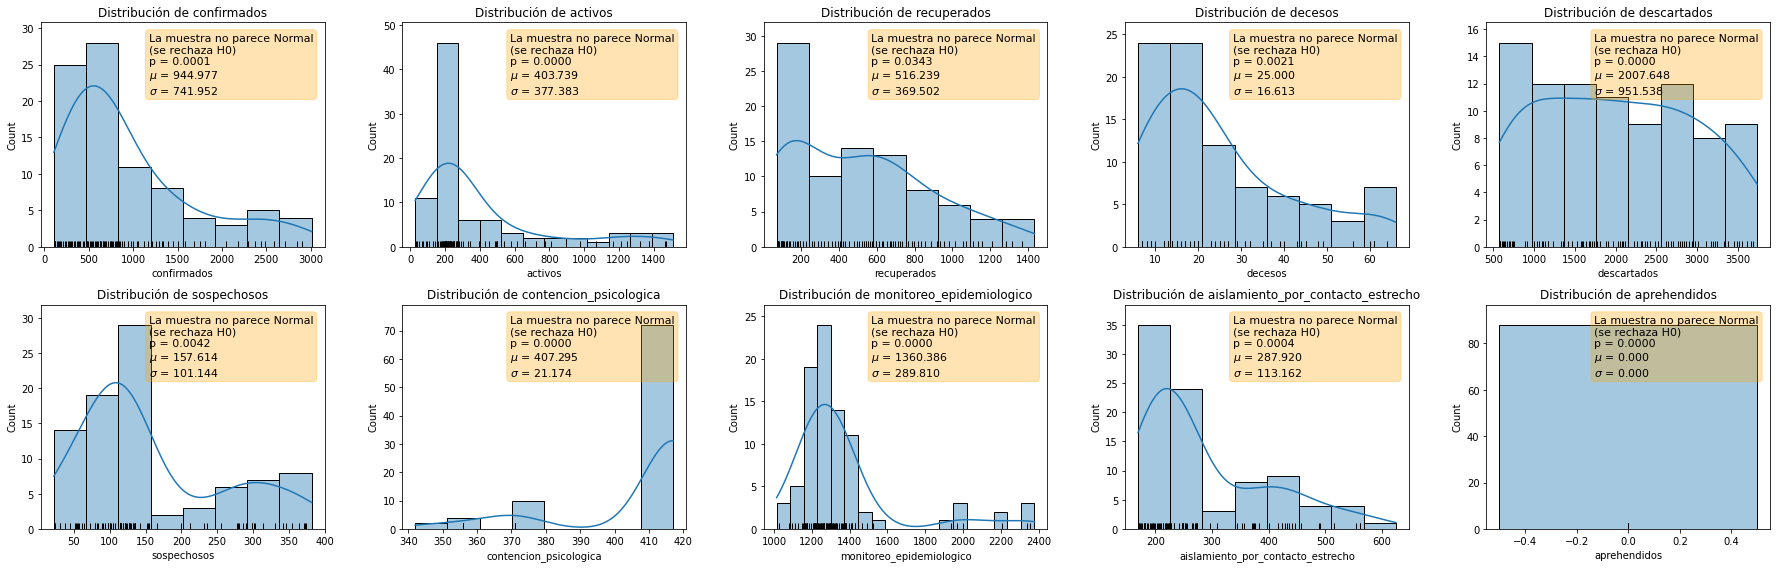

In [8]:
print_dataset(df1, 2, 5, criterio=1)

### Análisis de [casos_covid_bahia.csv](https://github.com/manlio99/Materia-deaprendizaje/blob/master/4_DataWrangling/data/casos_covid_bahia.csv)

#### Importar el dataset y eliminación de columnas indeseadas
En este casos las variables *Unnamed: 0*, *fecha* y *observaciones* no son analizables en torno a su distribución, por lo que se eliminaron dichas columnas y las filas donde la observación indica que faltan datos (otra solución podría haber sido utilizar el valor de la media en los datos faltantes).

In [9]:
df2 = pd.read_html("https://github.com/manlio99/Materia-de-aprendizaje/blob/master/4_DataWrangling/data/camas_covid_bahia.csv")[0]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0                             0 non-null      float64
 1   informeNumero                          88 non-null     int64  
 2   fecha                                  88 non-null     object 
 3   total_camas_hospitales                 88 non-null     int64  
 4   camas_ocupadas_hospitales              88 non-null     int64  
 5   porcentaje_ocupacion_camas_hospitales  88 non-null     int64  
 6   camas_covid                            88 non-null     int64  
 7   camas_sospechosos_covid                88 non-null     int64  
 8   camas_confirmados_covid                88 non-null     int64  
 9   porcentaje_ocupacion_camas_covid       88 non-null     int64  
 10  uti_covid_totales                      88 non-null     int64  
 11  uti_covi

In [10]:
print(df2["Unnamed: 0"])

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
83   NaN
84   NaN
85   NaN
86   NaN
87   NaN
Name: Unnamed: 0, Length: 88, dtype: float64


In [11]:
for i in df2["observaciones"].unique()[1:]:
    print(i)
    mask = df2['observaciones'] == i
    idx = df2.loc[mask, 'observaciones'].index[0]
    print(df2.values[idx][:-1],"\n")
    df2 = df2.drop(idx)

Sin información del Hospital Municipal. Por falta de datos, sin información de los totales de camas y respiradores.
[nan 124 '2020-09-18' 0 0 0 0 0 0 0 24 18 0 0 64 16 147 13 4] 

- El Hospital Municipal no brindó información de sectores Covid. - Por falta de datos informados por algunos hospitales, no se puede informar cantidades totales de camas ni de respiradores.
[nan 118 '2020-09-12' 848 387 45 163 24 70 57 31 21 142 34 64 18 147 9 4] 

Hospital Penna informó solo COVID
[nan 115 '2020-09-09' 0 0 0 163 25 52 47 31 17 0 0 62 14 147 6 4] 

Sin información del total de camas y del total de respiradores, el Hospital Penna informó solo COVID.
[nan 113 '2020-09-07' 848 309 36 163 29 42 43 31 14 142 31 67 19 147 5 4] 

Sin información del total de camas y del total de respiradores. Sin información del hospital HAM Hospital Penna informó solo COVID.
[nan 111 '2020-09-05' 848 362 42 163 19 58 47 32 13 142 30 64 16 147 8 4] 

SIN INFORMACIÓN DEL ESPAÑOL
[nan 38 '2020-07-28' 846 297 35 163 18

In [12]:
columnas_eliminar = ["Unnamed: 0", "fecha", "observaciones"]
df2 = df2.drop(columns = columnas_eliminar)
df2.head()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
0,131,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4
1,130,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4
2,129,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4
3,128,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4
4,127,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4


In [13]:
df2.describe()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,69.075000,847.762500,367.050000,42.850000,164.400000,20.100000,35.037500,33.087500,31.962500,7.800000,142.262500,25.525000,39.025000,8.237500,144.000000,5.037500,3.700000
std,41.837169,1.314416,37.164329,4.392456,4.615878,6.186142,21.523284,15.129143,0.248731,6.713674,0.442769,7.175865,27.739281,7.654309,4.611488,4.419301,0.461149
min,1.000000,844.000000,294.000000,34.000000,155.000000,10.000000,10.000000,15.000000,31.000000,1.000000,142.000000,14.000000,0.000000,0.000000,137.000000,0.000000,3.000000
25%,29.750000,848.000000,340.500000,40.000000,163.000000,16.000000,20.750000,22.000000,32.000000,3.000000,142.000000,21.000000,0.000000,0.000000,137.000000,2.750000,3.000000
50%,86.500000,848.000000,369.000000,43.000000,163.000000,18.500000,25.000000,26.500000,32.000000,4.000000,142.000000,25.000000,52.500000,7.000000,147.000000,4.000000,4.000000
75%,106.250000,848.000000,391.500000,46.000000,164.750000,23.000000,51.250000,41.500000,32.000000,12.250000,143.000000,28.000000,61.250000,13.250000,147.000000,6.000000,4.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000


#### Visualización histogramas
La prueba de D’Agostino’s K-squared realizada indica que son 3 las variables con distribución normal: *camas_ocupadas_hospitales*, *porcentaje_ocupacion_camas_hospitales* y *respiradores_ocupados*.

Sin embargo, podría decirse que *total_camas_hospitales*, *camas_covid* y *camas_sospechosas_covid*, *ubi_covid_totales*, visualmente presentan distribución normal. Por lo general esto pareciera suceder cuando las variables hacen referencia a cantidades de camas, respiradores. 

Aunque hay algunas variables que presentan una media muy corrida con colas abundantes como *camas_confirmados_covid* y *porcentaje_ocupacion_camas_covid*

Se destaca que algunas variables como *informeNumero*, *respiradores_totales*, *total_camas_ucma* y *sedes_ucma* presentan como dos bloques grandes diferenciables visualmente (los útlimos incluso tienen solo dos valores). 

Cantidad de datos con distribución normal:  3


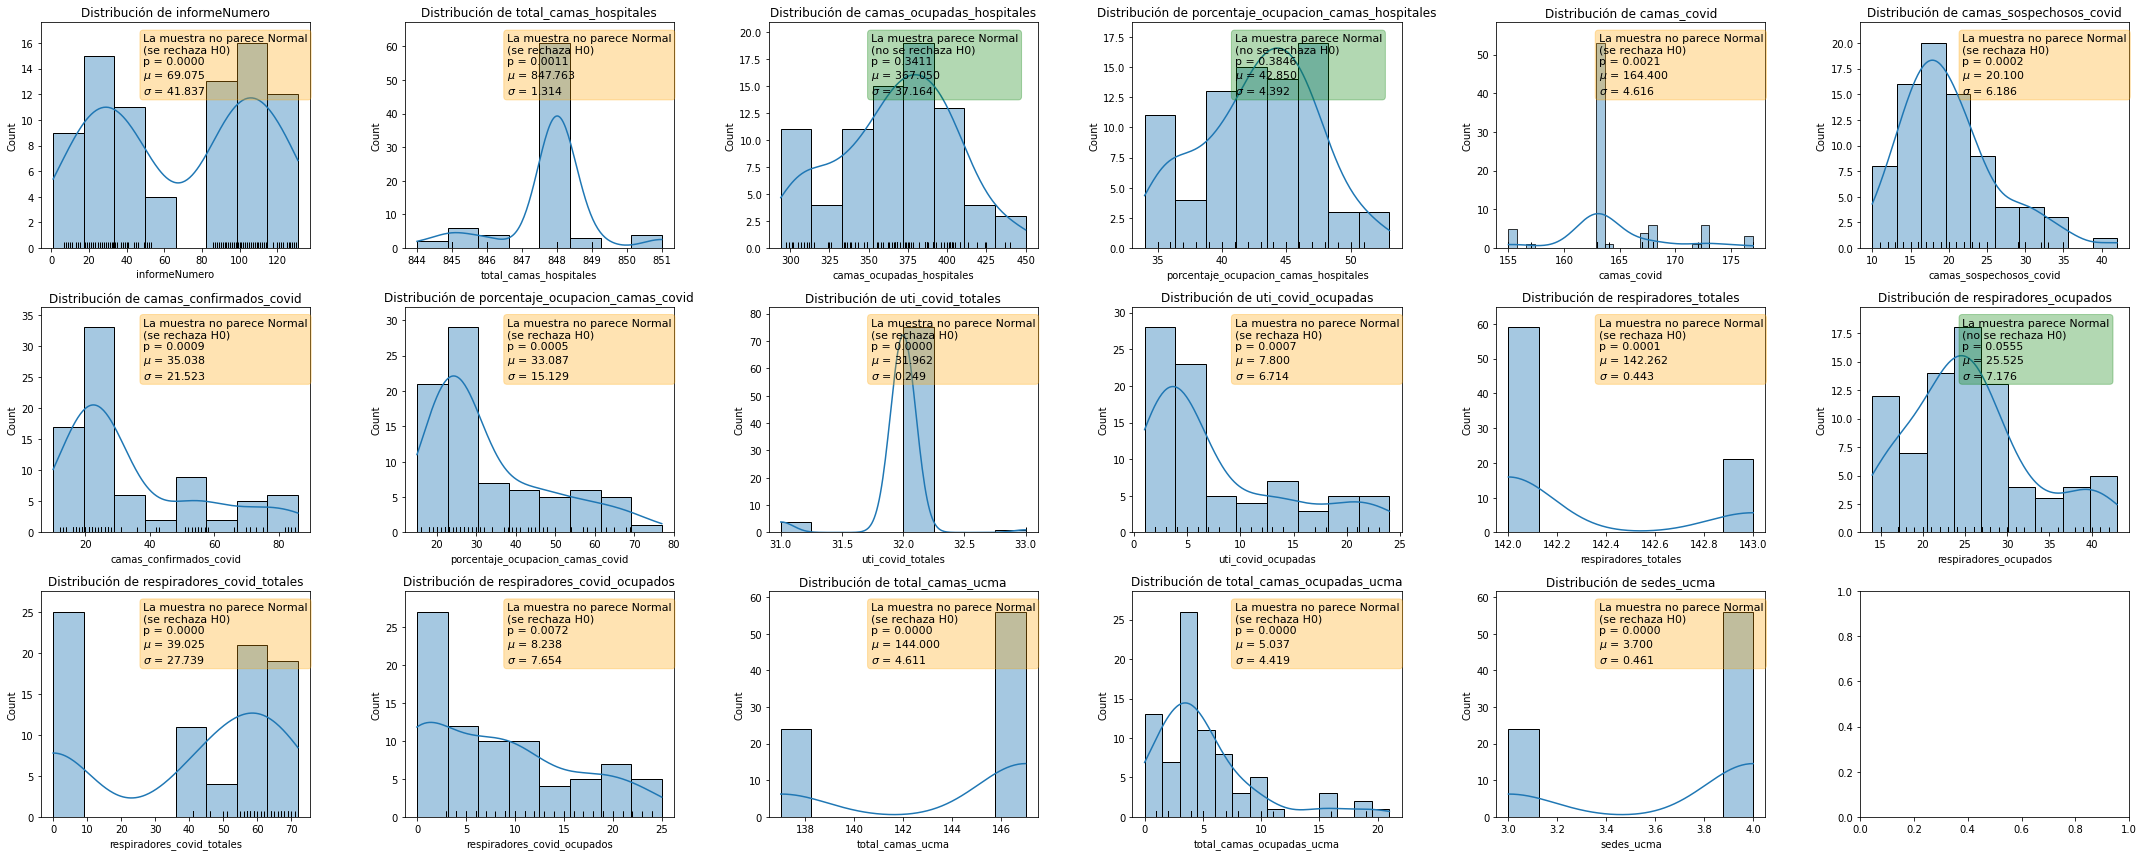

In [14]:
print_dataset(df2, 3, 6, criterio=1)

## Ejercicio 2
Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B). 

Utilizar la curva ROC para proponer un umbral para un clasificador
por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure). 

Recalcular para algunas variantes (por ejemplo, cercando las medias de los grupos A y B, cambiando el valor umbral, etc.). 

Cómo podrían hacer no supervisado este proceso?

### Funciones para la creación y visualización de Datasets

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
def generate_dataset(N, means=None, stds=None):
    '''
        generate_dataset:
            Genera un DataFrame con dos columnas ("A" y "B") con distribución normal.
            Recibe los valores de media y desviación estándar para cada conjunto.
            Si no se envía ninguno, los genera aleatoriamente con la salvedad de que
            la media de A será mayor que la de B. 
    '''
    if means is None:
        mean_A = np.random.randint(0, 5)
        mean_B = np.random.randint(0, 5)

        if(mean_A < mean_B): # A será mayor en este análisis
            aux = mean_A
            mean_A = mean_B
            mean_B = aux
    else:
        mean_A = means[0]
        mean_B = means[1]

    if stds is None:
        std_A = np.random.uniform(0, 2)
        std_B = np.random.uniform(0, 2)
    else:
        std_A = stds[0]
        std_B = stds[1]

    x_A = np.random.normal(loc=mean_A, scale=std_A, size=(N,))
    x_B = np.random.normal(loc=mean_B, scale=std_B, size=(N,))

    df = pd.DataFrame({'A': x_A ,'B': x_B})

    return df

In [56]:
def print_displot_dataset(df):
    '''
        print_displot_dataset:
            Función para el gráfico de distribución de un dataset de dos clases("A" y "B")
    '''
    fig = plt.figure()
    fg = sns.displot(df, kind="kde", rug=True)
    ax = fg.ax
    ax.set_title("Distribución de los datasets")

    colorA = sns.color_palette()[0]
    textA=f"$\\mu_A$ = {df['A'].mean():.3f}\n"
    textA+=f"$\\sigma_A$ = {df['A'].std(ddof=1):.3f}"
    bbox = dict(boxstyle='round', fc=colorA, alpha=0.45)
    ax.text(1, 0.9, textA, fontsize=12, bbox=bbox,
            transform=ax.transAxes, ha='right', va='top')

    colorB = sns.color_palette()[1]
    textB=f"$\\mu_B$ = {df['B'].mean():.3f}\n"
    textB+=f"$\\sigma_B$ = {df['B'].std(ddof=1):.3f}"
    bbox = dict(boxstyle='round', fc=colorB, alpha=0.45)
    ax.text(1, 0.75, textB, fontsize=12, bbox=bbox,
            transform=ax.transAxes, ha='right', va='top')

    fig.axes.append(ax)
    fig.show()

### Generación de un dataset aleatorio

<Figure size 432x288 with 0 Axes>

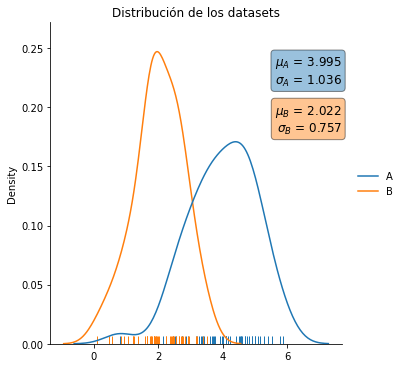

In [210]:
N = 50
df = generate_dataset(N)
print_displot_dataset(df)

### Funciones para la visualización de la curva ROC

In [211]:
def df_flatten_sort(df, N):
    '''
        df_flatten_sort:
            Toma el dataset enviado por parámetro y genera uno nuevo con los valores de
            las columnas "A" y "B" ordenados en una columna "valores" y otra "dataset" 
            donde se señala a qué conjunto pertenecía dicho valor originalmente.
    '''
    serieA = df['A']
    serieB = df['B']

    nombresA = np.full(N, 'A')
    nombresB = np.full(N, 'B')

    dataset = np.append(nombresA, nombresB)
    valores = np.append(serieA, serieB)

    df_flatten = pd.DataFrame({'valores': valores, 'dataset': dataset})
    df_sort = df_flatten.sort_values(by="valores", ascending=False)

    return df_sort

def roc_curve_values(classes, class_true, N):
    '''
        roc_curve_values:
            Cálculo de la curva ROC utilizando el método gráfico, partiendo de 
            los datos ordenados, si la clase es True se sube en la curva, y si es False
            se desplaza hacia la derecha
    '''
    roc = []
    t = []

    x,y = 0,0
    roc.append(y)
    t.append(x)

    for class_name in classes:
        if class_name == class_true:
            y+=1
        else:
            x+=1
        roc.append(y)
        t.append(x)

    t = np.array(t)
    roc = np.array(roc)

    return t/t.max(), roc/roc.max()

def print_roc(t, roc, class_true, punto = None):
    '''
        print_roc:
            Función para la visualización de la curva ROC y la recta identidad
            Puede recibir un punto que será marcado en color rojo
    '''
    plt.figure(figsize=(5.5, 5.5), dpi=80)
    plt.plot(t, roc, color=sns.color_palette()[1], label=f'Curva ROC - True: {class_true}')
    plt.plot([0, 1], [0, 1], color=sns.color_palette()[0], linestyle='--', label="Recta identidad")
    if not punto is None:
        plt.plot(punto[0], punto[1], '-o', color = 'red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

### Preparación de los datos y gráfico de la curva ROC

Se juntan y ordenan los datos en un dataframe *(df_sort)* para el cálculo y posterior gráfico de la curva ROC.

In [212]:
df_sort = df_flatten_sort(df, N)
df_sort

,valores,dataset
40,5.852050,A
48,5.779379,A
8,5.523850,A
15,5.396576,A
35,5.276218,A
...,...,...
91,0.848417,B
12,0.802870,A
95,0.558959,B
98,0.467434,B


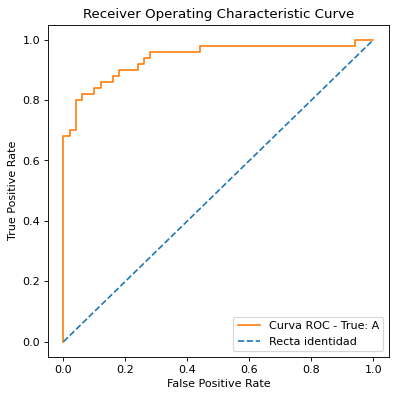

In [213]:
t, roc = roc_curve_values(df_sort['dataset'], 'A', N)
print_roc(t,roc,'A')

### Encontrar el mejor valor de umbral
El mejor umbral vendrá dado por aquel que genere la Curva ROC que se acerque más al punto (0, 1) del espacio ROC. Es decir, tenga la mayor cantidad de verdaderos positivos predichos. 

Para este caso se considerará la clase A como True para la evaluación en el espacio ROC. 

Dado que existen 2xN puntos, pueden considerarse 2xN posibles valores significativos de umbral. Se buscará encontrar el umbral que genere la menor distancia a la esquina superior izquierda. Es decir, se busca un balance favorable entre TPR y FPR. Luego se considerará como *umbral optimo* aquel valor entre los valores de los datos origininales que genera dichos parámetros. La distancia usada será la distancia geométrica.   

Punto mas cercano (FPR_optimo, TPR_optimo):  0.12 0.86
Umbral óptimo:  2.8375629386515957


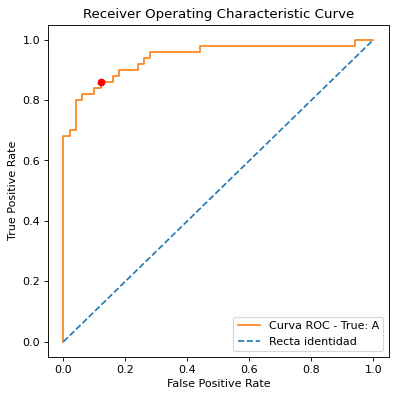

In [214]:
def buscar_umbral_optimo(valores, t, roc):
    '''
        buscar_umbral_optimo:
            Recibe una serie de valores y la curva ROC a partir de la cual
            se busca el umbral óptimo que genera el punto ROC más cercano a la
            esquina superior izquierda
    '''
    dist_min = np.inf
    i_min = 0
    par_min = (0,0)
    for i in range(t.shape[0]):
        par = (t[i],roc[i])
        dist = np.sqrt(par[0]**2 + (par[1]-1)**2)
        if dist<dist_min:
            dist_min = dist
            i_min = i
            par_min = par

    umbral = (valores[i_min] + valores[i_min-1])/2

    print("Punto mas cercano (FPR_optimo, TPR_optimo): ", t[i_min],roc[i_min])
    print("Umbral óptimo: ",umbral)

    print_roc(t,roc,'A',par_min)

    return umbral

umbral = buscar_umbral_optimo(df_sort["valores"].values, t, roc)

Gráfico del umbral junto con los datos procesados

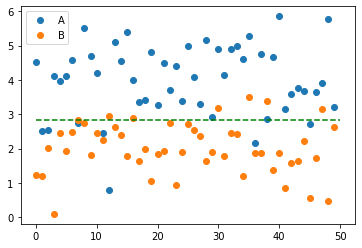

In [215]:
df.plot(style='o')
plt.plot([0,N],[umbral,umbral], '--', color='green')

plt.show()

Se realiza la predicción creando un DataFrame *(df_pred)* con los datos clasificados usando el umbral

In [216]:
df_pred = df_sort.copy()
df_pred['dataset'] = ['A' if x > umbral else 'B' for x in df_sort['valores']]

pd.DataFrame({'valores': df_sort["valores"].values, 'sort': df_sort["dataset"].values, 'pred': df_pred["dataset"].values}) # Visualización debug de comparación

,valores,sort,pred
0,5.852050,A,A
1,5.779379,A,A
2,5.523850,A,A
3,5.396576,A,A
4,5.276218,A,A
...,...,...,...
95,0.848417,B,B
96,0.802870,A,B
97,0.558959,B,B
98,0.467434,B,B


### Calculo de parámetros de calidad

Parámetros de calidad: 

TPR: 0.8600	FNR: 0.1400
FPR: 0.1200	TNR: 0.8800

PPV: 0.8776	FOR: 0.1373
FDR: 0.1224	NPV: 0.8627

Accuracy: 0.8700
F_measure: 0.8687
Indice de Jaccard: 0.7679



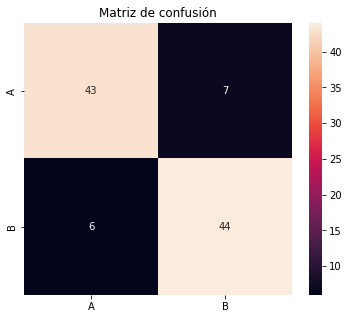

In [217]:
from sklearn.metrics import confusion_matrix

def print_params(real, pred):
    '''
        print_params:
            Función que calcula e imprime todos los parámetros de calidad.
            Grafica la matriz de confusión generada de la comparación de los valores
            reales y la clasificación realizada en pred.
    '''
    mc = confusion_matrix(real, pred)
    tp, fn, fp, tn = mc.flatten()
    
    tpr = tp / (tp + fn) # de los positivos cuantos se clasificaron positivos (correctos)   -> Sensibilidad o Recall
    tnr = tn / (tn + fp) # de los negativos cuantos se clasificaron negativos (correctos)   -> Especificidad
    fnr = fn / (tp + fn) # de los positivos cuantos se clasificaron negativos (incorrectos) -> 1 - Especificidad
    fpr = fp / (tn + fp) # de los negativos cuantos se clasificaron positivos (incorrectos) -> Fall-out

    ppv = tp / (tp + fp) # de los predichos positivos cuantos realmente eran positivos -> Presicion
    npv = tn / (tn + fn) # de los predichos negativos cuantos realmente eran negativos -> Negative Predictive Value
    fort= fn / (tn + fn) # de los predichos negativos cuantos eran positivos -> False omission Rate
    fdr = fp / (tp + fp) # de los predichos positivos cuantos eran negativos -> False Discovery Rate


    accuracy = (tp + tn)/(tp+fn+tn+fp) # del total cuantos se clasificaron correctamente
    f_measure = (2*ppv*tpr)/(ppv+tpr) # Indica que tan preciso y robusto es el clasificador
    idx_jacard = tp/(tp+fp+fn) # ignorando los tn, proporcion de tp frente a positivos reales y predichos

    report = f"Parámetros de calidad: \n\n"
    report += f"TPR: {tpr:.4f}\tFNR: {fnr:.4f}\nFPR: {fpr:.4f}\tTNR: {tnr:.4f}\n\n"
    report += f"PPV: {ppv:.4f}\tFOR: {fort:.4f}\nFDR: {fdr:.4f}\tNPV: {npv:.4f}\n\n"
    report += f"Accuracy: {accuracy:.4f}\nF_measure: {f_measure:.4f}\nIndice de Jaccard: {idx_jacard:.4f}\n"
    print(report)

    df_cm = pd.DataFrame(mc, index = [i for i in "AB"], columns = [i for i in "AB"])
    plt.figure(figsize = (6,5))
    sns.heatmap(df_cm, annot=True)
    plt.title("Matriz de confusión")
    plt.show()

print_params(df_sort['dataset'], df_pred['dataset'])

En el caso (aleatorio) analizado, se obtiene la siguiente salida: 

```
Parámetros de calidad: 

TPR: 0.8600	FNR: 0.1400
FPR: 0.1200	TNR: 0.8800

PPV: 0.8776	FOR: 0.1373
FDR: 0.1224	NPV: 0.8627

Accuracy: 0.8700
F_measure: 0.8687
Indice de Jaccard: 0.7679
```

Aquí se puede ver en primer lugar que es posible clasificar el 87% (accuracy) de los ejemplos utilizando el umbral óptimo. Además que el TPR y FPR se mantienen alto y bajo respectivamente, tal y como se planteó al momento de buscar el umbral óptimo. 

En este caso, además se obtuvo un F_measure alto (0.8687), lo que quiere decir que hay un buen balance entre la presición y la sensibilidad.



### Análisis de casos

#### Si las funciones de distribución se encuentran muy alejadas y no hay superposición

Claramente se puede establecer un umbral entre ambas medias, clasificando correctamente cualquier punto nuevo que se proponga. 

<Figure size 432x288 with 0 Axes>

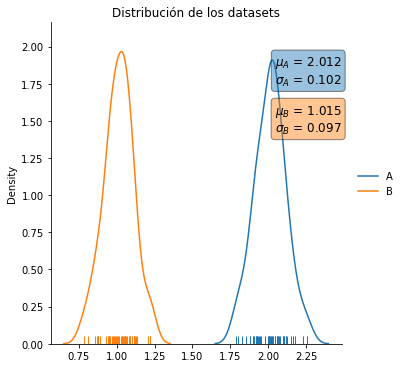

In [218]:
N = 50
means = (2,1)
stds = (0.1, 0.1)
df = generate_dataset(N, means, stds)
fig = print_displot_dataset(df)

Se obtiene la mejor curva ROC posible, aquella que alcanza el (0,1).

Punto mas cercano (FPR_optimo, TPR_optimo):  0.0 1.0
Umbral óptimo:  1.5039282888397147


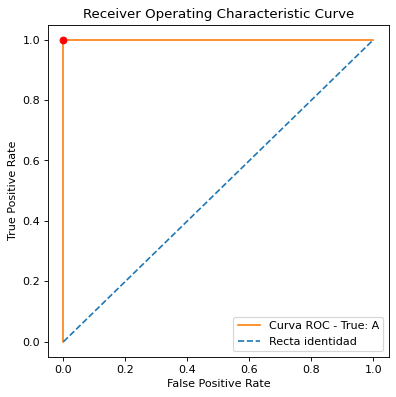

In [219]:
df_sort = df_flatten_sort(df, N)
t, roc = roc_curve_values(df_sort['dataset'], 'A', N)
umbral = buscar_umbral_optimo(df_sort["valores"].values, t, roc)

Se diferencian todos los puntos correspondientes al dataset 'A' por encima del umbral dejando por debajo los puntos de 'B'

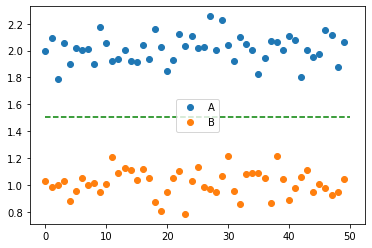

In [220]:
df.plot(style='o')
plt.plot([0,N],[umbral,umbral], '--', color='green')

plt.show()

Se logran clasificar correctamente todos los elementos, por eso TPR, TNR, PPV y NPV se mantienen en 1, lo que genera las mejores métricas en cuanto a exactitud F_measure e Indice de Jaccard

Parámetros de calidad: 

TPR: 1.0000	FNR: 0.0000
FPR: 0.0000	TNR: 1.0000

PPV: 1.0000	FOR: 0.0000
FDR: 0.0000	NPV: 1.0000

Accuracy: 1.0000
F_measure: 1.0000
Indice de Jaccard: 1.0000



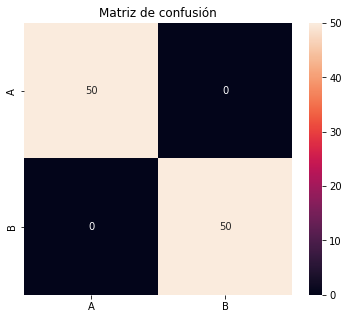

In [221]:
df_pred = df_sort.copy()
df_pred['dataset'] = ['A' if x > umbral else 'B' for x in df_sort['valores']]
print_params(df_sort['dataset'], df_pred['dataset'])

#### Si las distribuciones se superponen por medias cercanas
Viendo los gráficos de distribución se puede observar que resultará más dificil poder diferenciar entre ambos conjuntos

<Figure size 432x288 with 0 Axes>

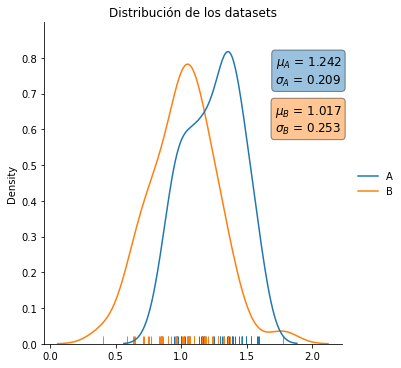

In [231]:
N = 50
means = (1.25,1)
stds = (0.25, 0.25)
df = generate_dataset(N, means, stds)
fig = print_displot_dataset(df)

A pesar de ello, a partir de la curva ROC se puede encontrar el umbral que genera el punto en el espacio ROC más favorable, es decir aquel que mantenga menor tasa de fallos de 'A' y mayor tasa de aciertos de 'A'.

Cabe aclarar también que el umbral óptimo en este método, se encuentra en el punto en el que las curvas de densidad tienen el mismo valor (se puede ver arriba al buscar aproximadamente donde se ubica el umbral = 1.11). Esto se corresponde a la regla del mínimo error.

Punto mas cercano (FPR_optimo, TPR_optimo):  0.3 0.72
Umbral óptimo:  1.1199012972365923


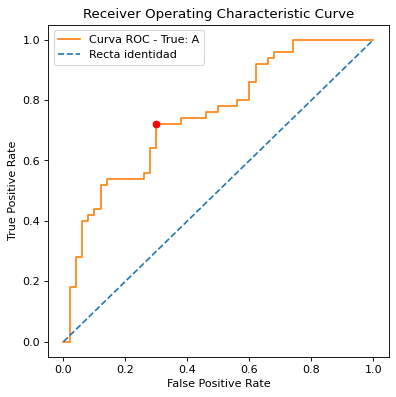

In [232]:
df_sort = df_flatten_sort(df, N)
t, roc = roc_curve_values(df_sort['dataset'], 'A', N)
umbral = buscar_umbral_optimo(df_sort["valores"].values, t, roc)

Visualmente aquí se nota lo anteriormente mencioando, es complejo determinar los grupos

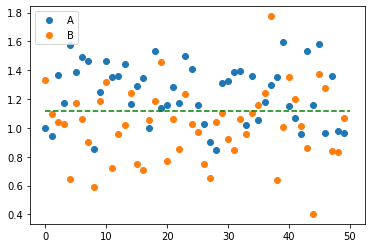

In [236]:
df.plot(style='o')
plt.plot([0,N],[umbral,umbral], '--', color='green')

plt.show()

A pesar de ello, gracias al establecimiento del umbral óptimo, se logra clasificar correctamente la mayor cantidad de elementos y de manera similar para ambas clases. A pesar de estar superpuestas, tienen la misma desviación estandar, por lo que se clasifican bien y mal de manera proporcional en ambos grupos. 

Parámetros de calidad: 

TPR: 0.7200	FNR: 0.2800
FPR: 0.3000	TNR: 0.7000

PPV: 0.7059	FOR: 0.2857
FDR: 0.2941	NPV: 0.7143

Accuracy: 0.7100
F_measure: 0.7129
Indice de Jaccard: 0.5538



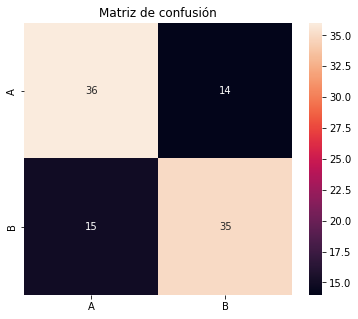

In [235]:
df_pred = df_sort.copy()
df_pred['dataset'] = ['A' if x > umbral else 'B' for x in df_sort['valores']]
print_params(df_sort['dataset'], df_pred['dataset'])

#### Si las distribuciones se superponen completamente (misma media y varianza)

Resulta prácticamente imposible poder determinar si un punto corresponde al conjunto de datos A o al B.

<Figure size 432x288 with 0 Axes>

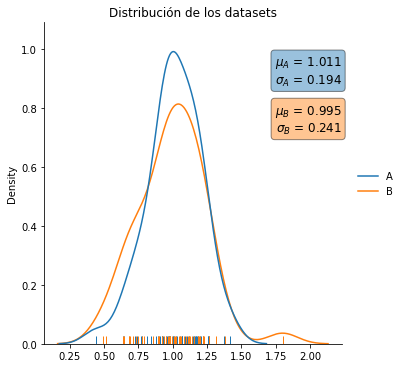

In [238]:
N = 50
means = (1,1)
stds = (0.2, 0.2)
df = generate_dataset(N, means, stds)
fig = print_displot_dataset(df)

Se puede observar que la curva ROC varía en torno a la recta identidad, puesto que la clasificación es como si se tirase una moneda. 

Punto mas cercano (FPR_optimo, TPR_optimo):  0.5 0.54
Umbral óptimo:  0.9974781525794575


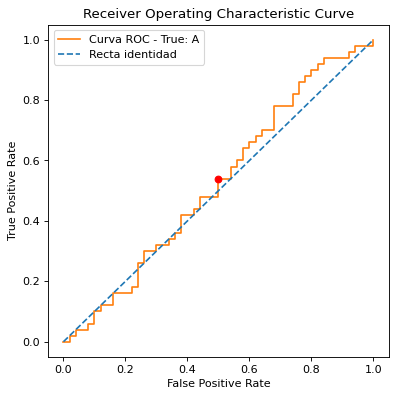

In [240]:
df_sort = df_flatten_sort(df, N)
t, roc = roc_curve_values(df_sort['dataset'], 'A', N)
umbral = buscar_umbral_optimo(df_sort["valores"].values, t, roc)

El umbral no separa ambos conjuntos por la distribución de sus datos

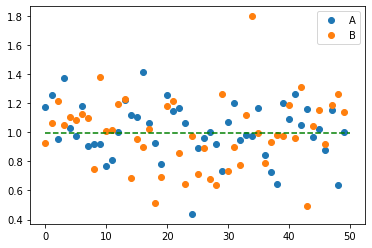

In [241]:
df.plot(style='o')
plt.plot([0,N],[umbral,umbral], '--', color='green')

plt.show()

Se obtiene una matriz de confusión con valores similares en los cuatro cuadrantes, dado que se acierta y falla en proporciones similares. Por eso el accuracy es aproximadamente del 50%.

Parámetros de calidad: 

TPR: 0.5400	FNR: 0.4600
FPR: 0.5000	TNR: 0.5000

PPV: 0.5192	FOR: 0.4792
FDR: 0.4808	NPV: 0.5208

Accuracy: 0.5200
F_measure: 0.5294
Indice de Jaccard: 0.3600



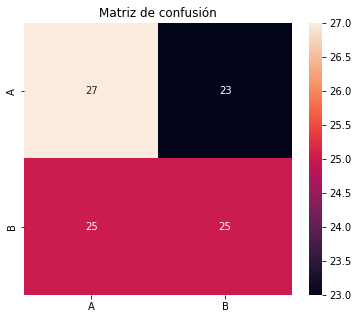

In [242]:
df_pred = df_sort.copy()
df_pred['dataset'] = ['A' if x > umbral else 'B' for x in df_sort['valores']]
print_params(df_sort['dataset'], df_pred['dataset'])

#### Si hay superposición pero con distinto desvío estandar

Se puede ver que a pesar de que visualmente se observa una diferencia en las distribuciones, la de 'B' se encuentra en "medio" de la de 'A'

<Figure size 432x288 with 0 Axes>

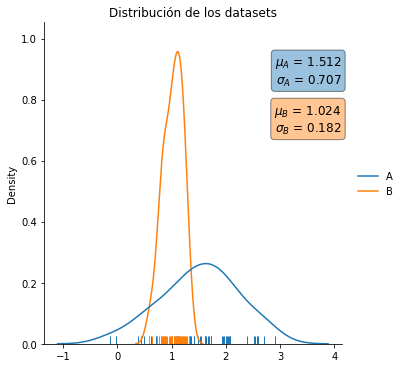

In [243]:
N = 50
means = (1.5,1)
stds = (0.7, 0.2)
df = generate_dataset(N, means, stds)
fig = print_displot_dataset(df)

Se selecciona el umbral óptimo a partir de la curva ROC. Particularmente en este caso, resulta con FDR = 0.

Punto mas cercano (FPR_optimo, TPR_optimo):  0.0 0.66
Umbral óptimo:  1.3277641721600788


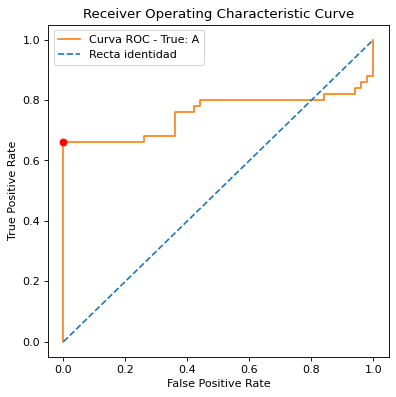

In [244]:
df_sort = df_flatten_sort(df, N)
t, roc = roc_curve_values(df_sort['dataset'], 'A', N)
umbral = buscar_umbral_optimo(df_sort["valores"].values, t, roc)

Se puede observar que todos los puntos de 'B' quedan por debajo del umbral, cosa que no sucede con los de 'A' porque claramente se encuentran más dispersos.

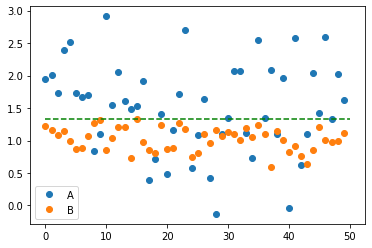

In [245]:
df.plot(style='o')
plt.plot([0,N],[umbral,umbral], '--', color='green')

plt.show()

Se confirma lo anteriormente mencionado, todos los elementos de la clase 'B' son correctamente clasificados, sin embargo, no sucede lo mismo para la clase 'A' ya que existen muchos valores de este conjunto que fueron clasificados como 'B'. 

Entonces todos los elementos clasificados como 'A' realmente lo eran (PPV o Presición), no sucede lo mismo con la clase 'B' ya que algunos 'A' erroneamente se predijeron como 'B'.

Sin embargo todos los elementos de la clase 'B' fueron correctamente clasificados (existe una mayor tendencia a clasificar como 'B') y hubo 17 errores para la clase 'A'.

Parámetros de calidad: 

TPR: 0.6600	FNR: 0.3400
FPR: 0.0000	TNR: 1.0000

PPV: 1.0000	FOR: 0.2537
FDR: 0.0000	NPV: 0.7463

Accuracy: 0.8300
F_measure: 0.7952
Indice de Jaccard: 0.6600



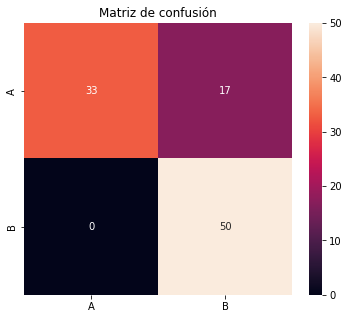

In [246]:
df_pred = df_sort.copy()
df_pred['dataset'] = ['A' if x > umbral else 'B' for x in df_sort['valores']]
print_params(df_sort['dataset'], df_pred['dataset'])

### Posibilidad de no supervisado

El proceso anteriormente planteado se ha basado en el hecho de que se conoce a priori la clase a la que pertenece cada valor. Sin embargo, si no se cuenta con este dato, se debería plantear encontrar k grupos de datos entre los disponibles. 

Se podría establecer una medida de distancia a partir de la cual se vaya minimizando la distancia de elementos dentro de un grupo y maximizandola entre grupos distintos. 

En este caso k=2, indicando que existen dos grupos que pueden ser caracterizados con uno o más valores (por ejemplo la media y desviación estándar). La dificultad de este tipo de problemas se basa en el trabajo necesario para definir los grupos y luego podrían evaluarse los distintos parámetros de calidad para comprobar la correctitud de las características del grupo (definidas a partir de un ejemplo principal o centroide). 

<hr>

*Actualización:* Revisando las clases me he dado cuenta que con "no supervisado", en este caso se hace referencia a la automatización del proceso. 

El algoritmo propuesto anteriormente busca encontrar el umbral óptimo a partir de la evaluación de los puntos de la curva ROC que fue generada siguiendo el método gráfico (ordenamos los datos y recorriendo desde los mayores hacia los menores, desplazando la curva hacia arriba si corresponde a la clase True o hacia la derecha si no lo es). Dicho umbral seleccionado como el valor promedio entre los datos que generaron el punto más cercano de la curva a la esquina superior izquierda. 

De otra manera, sabiendo que la curva se forma a partir de los TPR y FPR, se podría proponer 2xN valores de umbral, realizar las predicciones para cada uno y dibujar la recta y ver cuál generó el punto más cercano a la esquina mencionada.


## Ejercicio 3

Cómo serían los pasos si el dataset fuese 2D?

Puedo utilizar la curva ROC sin ninguna estimación previa?

Caso negativo, qué estimación sería útil (y cómo obtenerla)?

### Generación del dataset 2D

In [251]:
def df_flatten_2D(df_x, df_y, N):
    '''
        df_flatten_2D:
            Une dos DataFrame de columnas "A" y "B" correspondientes a valores en X y en Y.
    '''
    nombresA = np.full(N, 'A')
    nombresB = np.full(N, 'B')

    dataset = np.append(nombresA, nombresB)
    valores_x = np.append(df_x['A'], df_x['B'])
    valores_y = np.append(df_y['A'], df_y['B'])

    df_flatten = pd.DataFrame({'x': valores_x, 'y': valores_y, 'dataset': dataset})

    return df_flatten

In [366]:
N = 50
df_x = generate_dataset(N)
df_y = generate_dataset(N)

df_2D = df_flatten_2D(df_x,df_y,N)
df_2D

,x,y,dataset
0,1.603222,3.677267,A
1,0.183108,4.397804,A
2,0.552513,1.728923,A
3,1.324786,0.667504,A
4,1.804864,2.553584,A
...,...,...,...
95,1.513779,1.850219,B
96,2.716485,-0.289433,B
97,0.313286,1.972707,B
98,-0.866349,0.077103,B


### Gráficas de los datos

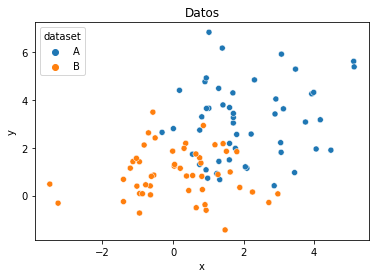

In [367]:
sns.scatterplot(data = df_2D, x = 'x', y = 'y', hue = 'dataset').set_title("Datos")
plt.show()

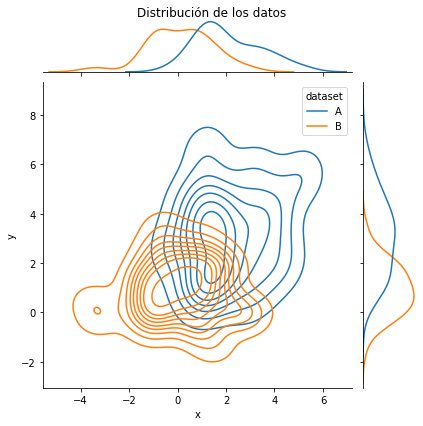

In [368]:
jp = sns.jointplot(data=df_2D, x='x', y='y', hue="dataset", kind="kde")
jp.fig.suptitle("Distribución de los datos")
jp.fig.subplots_adjust(top=0.95)
plt.show()

### Planteando problemas...

En la solución del ejercicio 2, se planteó buscar un valor de "umbral" para la lograr la mejor clasificación partiendo de la construcción de la curva ROC. Sin embargo, en este caso no es posible usar solo un umbral, sería necesario tener una función en el espacio 2D capaz de separar ambos conjuntos. Además el método gráfico de construcción de la curva ROC ya no tiene mucho sentido puesto que se debería buscar la forma de "ordenar" los datos que ahora cuentan de dos componentes, por lo que la construcción de la misma dependerá de la evaluación y obtención de los distintos valores de TPR y FPR.

En principio podría tratarse de una recta o parábola por sobre la cual se seleccione una de las dos clases dejando por debajo a la segunda, e ir ajustando dicha curva hasta obtener las mejores métricas. El problema surge de que podría no tenerse en cuenta la distribución que tienen los datos. 

En el caso de 1D, usando la regla del mínimo error, se clasificaba en función de la cercanía a la media de la distribución de cada grupo. En 2D podemos establecer un centroide formado por la media de *x* y de *y*, aunque se deberá tener en cuenta las curvas de desvío (o más precisamente la convarianza) al momento de medir la cercanía a los centroides (distancia de Mahalanobis). Por lo que la superficie discriminante que maximiza la diferenciación es una función que podría tener componentes cuadráticas y que tiene en cuenta la covarianza.

### Propuesta simplificada
Dado que el autor de este cuaderno no conoce la forma de encontrar la superficie discriminante óptima, se propone una simplificación a una recta basada en dos puntos. El primero de ellos construido por los umbrales encontrados de la forma 1D para cada variable independientemente (en *x* y en *y*) y el segundo aquel que minimiza la distancia entre el primer punto y la recta formada entre los centroides.

En las siguientes imágenes se aplica gráficamente esta estrategia. Con rojo se establecen los umbrales (la intersección de ambas rectas es el primer punto), en verde (salvo en la primera que es naranja) la recta entre centroides. Y por último en azul la recta discriminante.

*Aclaración:* Esta idea esta basada en lo que se puede observar gráficamente e intentando utilizar el concepto de umbral antes empleado. 

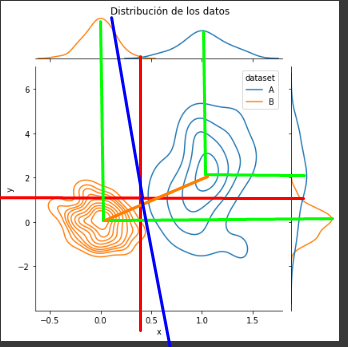 
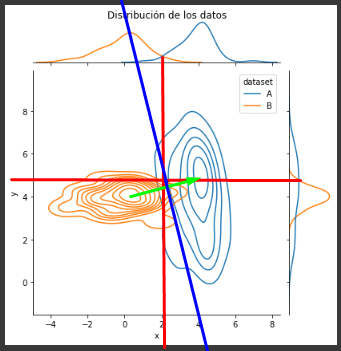
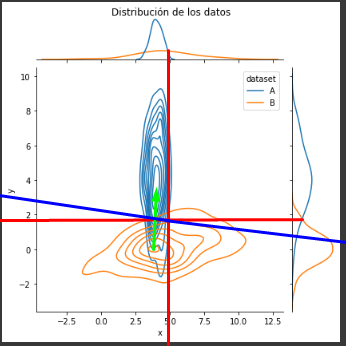
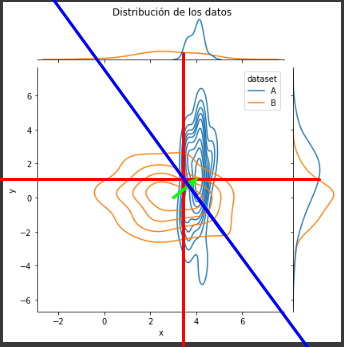

#### Cálculo del primer punto

Punto mas cercano (FPR_optimo, TPR_optimo):  0.22 0.82
Umbral óptimo:  0.9409058164460755


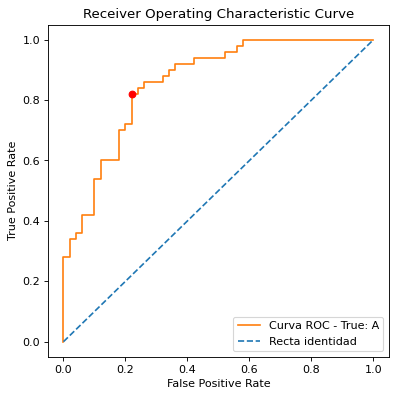

In [369]:
df_sort_x = df_flatten_sort(df_x, N)
t, roc = roc_curve_values(df_sort_x['dataset'], 'A', N)
umbral_x = buscar_umbral_optimo(df_sort_x["valores"].values, t, roc)

Punto mas cercano (FPR_optimo, TPR_optimo):  0.18 0.74
Umbral óptimo:  1.8765861487881423


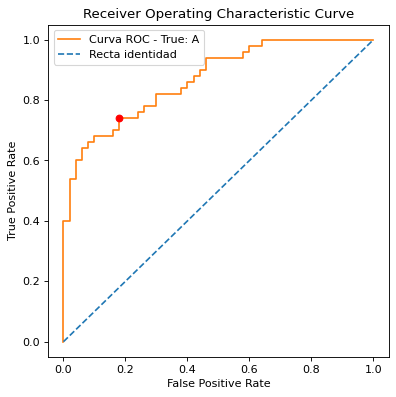

In [370]:
df_sort_y = df_flatten_sort(df_y, N)
t, roc = roc_curve_values(df_sort_y['dataset'], 'A', N)
umbral_y = buscar_umbral_optimo(df_sort_y["valores"].values, t, roc)

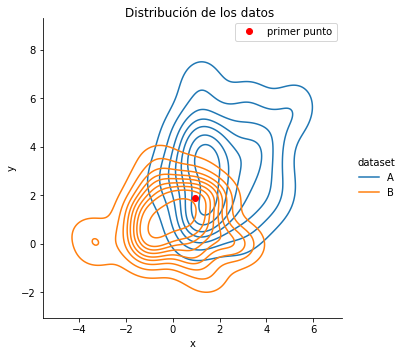

In [402]:
jp = sns.displot(data=df_2D, x='x', y='y', hue="dataset", kind="kde")
plt.plot(umbral_x, umbral_y, "o", color="red", label="primer punto")
jp.fig.suptitle("Distribución de los datos")
jp.fig.subplots_adjust(top=0.95)
plt.legend()
plt.show()

#### Calculo del segundo punto y la recta discriminante

Se utiliza libraría geometry dado que brinda funciones requeridas para un mejor manejo de puntos. 

In [430]:
from sympy.geometry import *

# Creación de puntos en formato geometry
centroide_A = Point(df_x["A"].mean(), df_y["A"].mean())
centroide_B = Point(df_x["B"].mean(), df_y["B"].mean())
primer_punto = Point(umbral_x, umbral_y)

# Segmento entre centroides
S1 = Segment(centroide_A, centroide_B)

#Se crea una recta que es perpendicular al segmento y contiene el primer punto
recta_discriminante = S1.perpendicular_line(primer_punto)
print("recta_discriminante:" ,recta_discriminante.equation())

recta_discriminante: 488579828133923*x/250000000000000 + 2166005394887969*y/1000000000000000 - 1475881532651219345305939808063/250000000000000000000000000000


#### Gráfico de la recta discriminante

Despeje de y: 


```
cx * x + cy * y + ord = 0
cx * x + ord = -cy * y
(-1/cy)* (cx*x+ord) = y
```

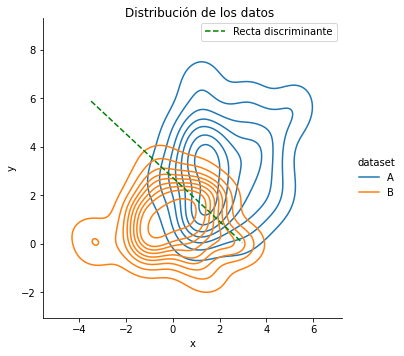

In [480]:
x_minA = df_x["A"].min()
x_minB = df_x["B"].min()
x_maxA = df_x["A"].max()
x_maxB = df_x["B"].max()

x_min = x_minA if x_minA<x_minB else x_minB
x_max = x_maxA if x_maxA<x_maxB else x_maxB

cx, cy, ord = recta_discriminante.coefficients
p1 = (x_min, (-1/cy) * (cx*x_min + ord))
p2 = (x_max, (-1/cy) * (cx*x_max + ord))

jp = sns.displot(data=df_2D, x='x', y='y', hue="dataset", kind="kde")
plt.plot([p1[0],p2[0]],[p1[1],p2[1]], '--', color='green', label="Recta discriminante")
jp.fig.suptitle("Distribución de los datos")
jp.fig.subplots_adjust(top=0.95)
plt.legend()
plt.show()

### Cálculo de parámetros

Se puede observar que se han clasificado una gran cantidad de ejemplos (valores presentes en la diagonal principal y accuracy). Los fallos se mantuvieron bajos y el equilibrio entre presición y especificidad (dado por la métrica F_measure)

Parámetros de calidad: 

TPR: 0.8400	FNR: 0.1600
FPR: 0.1400	TNR: 0.8600

PPV: 0.8571	FOR: 0.1569
FDR: 0.1429	NPV: 0.8431

Accuracy: 0.8500
F_measure: 0.8485
Indice de Jaccard: 0.7368



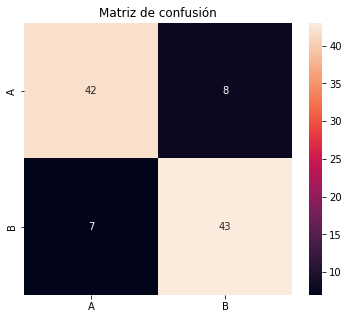

In [484]:
df_pred_2D = df_2D.copy()
df_pred_2D['dataset'] = ['A' if y > (-1/cy) * (cx*x + ord) else 'B' for (x,y) in zip(df_2D['x'], df_2D["y"])]
print_params(df_2D['dataset'], df_pred_2D['dataset'])